###  <center> The Exploration of Harmonic Motion and The Journey to Nonlinear Mechanics <br>
<center> Evan Bayer, Jesús Minakata Mata, Vaughn Gerrits


Hello!! <br>
Thank you for taking the time to view our simulations! <br>
This Notebook when paired with our Paper, will help you easily learn and understand the concepts of __Simple Harmonic Motion__ and later the wonders of __Nonlinear Mechanics__ and __Chaos__. There are a couple things to note before diving into this Notebook, Its recommended that you follow along with our paper so make sure to have that open as you play around with our code. Also you will see right below this cell a massive hunk of code, __DO NOT__ change anything in that cell as it will mess up the entire animation system. It is recommeded that you read the documentation for each animation class as it will be helpful when calling the function. We have set up specific cells that are "pre-fit" with the code you will need that are highlighted, these cells allow you to change the different conditions of the system that was explored.

When running the code, Please run the Animation Cell once, Then run the Condition Cell. Then finally the Simulation Cell. If you change the Initial Conditions, you will need to rerun the Condition, and Simulation Cell. You should only have to run the Path cells once, as when you run the simulation cell you will be calling the function.

NOTE: pygame may need to be installed if is not working, if using jupyter online you should be fine, if using offline jupyter (launched from cmd) then you will need to download pygame via pip install 

### ANIMATION CELL

In [1]:
## DO NOT CHANGE 

import pygame
import sys
import math
import time

class AnimateNoString:
    def __init__(self, Path, xlim, ylim, width=700, height=400, unit=50 ):
        
        ##Path is a list(listx,listy,listt) where listx and listy are the corresponding x and y positions and listt is the list of time values
        ## xlim and ylim set the axis/graph, note -ylim = ylim, and -xlim = xlim in units
        ## width and height are bounds for the screen that the simulations are displayed on in pixels, default is 700*400
        ## the default unit system is 1 unit = 50 pixels

        ## Use this for The Hookes Law
        
        # Initialize Pygame
        pygame.init()

        # Set up the display window
        pygame.display.set_caption("Spring Animation")
        screen = pygame.display.set_mode((width, height))
        yoffset = height//2
        xoffset = width//2
        ori = [xoffset,yoffset]
        
        ##Set Up the X-Y Plane
        Plane = pygame.Rect(round(xoffset-(xlim*unit)),round(yoffset-(ylim*unit)), round(2*unit*xlim), round(2*unit*ylim))
        pygame.draw.rect(screen, (255,0,0), Plane, 10)
        

        # Set up the Dot
        point_radius = 5
        point_color = (0, 0, 0)  # Red


        # Set up the clock
        clock = pygame.time.Clock()
        delay = (Path[2][-1])/(len(Path[0]))
        # Main loop
        i = 0
        while True:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()

           
            # Update the point position
            posx = ((Path[0][i])*unit) + xoffset
            posy = ((Path[1][i])*unit) + yoffset
            i = i + 1 
            if i == len(Path[0]):
                    i = 0 
                
            time.sleep(delay)
            
            

            # Clear the screen
            screen.fill((255, 255, 255))

            # Draw the point
            pygame.draw.circle(screen, point_color, (posx, posy), point_radius)
            ## Draw the Plane 
            Plane = pygame.Rect(round(xoffset-(xlim*unit)),round(yoffset-(ylim*unit)), round(2*unit*xlim), round(2*unit*ylim))
            pygame.draw.rect(screen, (0,0,0), Plane, 1)
            ## Draw the Block-Spring
            pygame.draw.rect(screen,(0,0,0),(ori[0]+(min(Path[0])*unit)-unit,posy-12, 25, 25))
            pygame.draw.line(screen,(0,0,0), (ori[0]+(min(Path[0])*unit)-unit,posy),(posx,posy))

            # Update the display
            pygame.display.flip()

            # Cap the frame rate
            clock.tick(60)  # Adjust the frame rate by changing this value

class AnimateString:
    
    def __init__(self, Path1, Path2, xlim, ylim,width=700, height=400, unit=50):

        ##Use this for single pendulums
        ##path1 is the path of object 1 (black) 
        ##path 2 is the path of object 2 (red) 
        ##xlim and ylim are the limits of the x-y plane, in units
        ##l is the length of the string
        ##width is the width of the display window (not the plane) 
        ##height is the height of the display window (not the plane) 
        ## unit specifies what 1 unit is in pixels, default is 50
        
        # Initialize Pygame
        pygame.init()

        # Set up the display window
        pygame.display.set_caption("Pendulum Animation")
        screen = pygame.display.set_mode((width, height))
        yoffset = height//2
        xoffset = width//2
        ori = [xoffset,yoffset]
        ##Set Up the X-Y Plane 
        Plane = pygame.Rect(round(xoffset-(xlim*unit)),round(yoffset-(ylim*unit)), round(2*unit*xlim), round(2*unit*ylim))

        # Set up the Dot
        point_radius = 5
        if Path1 == Path2:
            point_color1 = (0,0,0)
            point_color2 = (0,0,0)
        else:
            point_color1 = (0,0,0)
            point_color2 = (255,0,0)
        
            
        


        # Set up the clock
        clock = pygame.time.Clock()
        delay = (Path1[2][-1])/(len(Path1[0])) ## Velocity rahhhhhh
        i = 0
        while True:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
            
            
            # Update the point position
            posx1 = ((Path1[0][i])*unit) + xoffset
            posy1 = ((Path1[1][i])*unit) + yoffset
            posx2 = ((Path2[0][i])*unit) + xoffset
            posy2 = ((Path2[1][i])*unit) + yoffset
            i = i + 1 
            if i == len(Path1[0]):
                    i = 0 
            ##"Velocity"
            time.sleep(delay)
            
    
            # Wipe the screen 
            screen.fill((255, 255, 255))
            

            #Draw the point
            pygame.draw.circle(screen, point_color1, (posx1, posy1), point_radius)
            pygame.draw.circle(screen, point_color2, (posx2, posy2), point_radius)
            ##Draw the Plane
            Plane = pygame.Rect(round(xoffset-(xlim*unit)),round(yoffset-(ylim*unit)), round(2*unit*xlim), round(2*unit*ylim))
            pygame.draw.rect(screen, (0,0,0), Plane, width = 1)
            ##Draw the String 
            pygame.draw.line(screen,(0,0,0),ori,[posx1,posy1],width=1)
            pygame.draw.line(screen,(0,0,0),ori,[posx2,posy2],width=1)
            

            # Update the display
            pygame.display.flip()

            # Cap the frame rate
            clock.tick(60)  # Adjust the frame rate by changing this value
        
class AnimateMultipleString:
    
    def __init__(self, Paths, xlim, ylim,width=700, height=400, unit=50):

        ##Use this for single pendulums
        ##paths is a list of path 
        ##xlim and ylim are the limits of the x-y plane, in units
        ##l is the length of the string
        ##width is the width of the display window (not the plane) 
        ##height is the height of the display window (not the plane) 
        ## unit specifies what 1 unit is in pixels, default is 50
        
        # Initialize Pygame
        pygame.init()

        # Set up the display window
        pygame.display.set_caption("Pendulum Animation")
        screen = pygame.display.set_mode((width, height))
        yoffset = height//2
        xoffset = width//2
        ori = [xoffset,yoffset]
        ##Set Up the X-Y Plane 
        Plane = pygame.Rect(round(xoffset-(xlim*unit)),round(yoffset-(ylim*unit)), round(2*unit*xlim), round(2*unit*ylim))

        # Set up the Dot
        point_radius = 5
        pc1 = (255,204,204) ##pink
        pc2 = (255,51,51) ##redish pink
        pc3 = (204,0,0) #maroon
        pc4 = (0,0,0) ## Black
        pc5 = (0,204,0) ## Green
        pc6 = (51,255,51) ##light green
        pc7 = (204,255,204) ## very light green
        
            
        


        # Set up the clock
        clock = pygame.time.Clock()
        delay = (Paths[0][2][-1])/(len(Paths[0][0])) ## Velocity rahhhhhh
        i = 0
        while True:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
            
            
            # Update the point position
            posx1 = ((Paths[0][0][i])*unit) + xoffset ##Black Dot
            posy1 = ((Paths[0][1][i])*unit) + yoffset 
            posx2 = ((Paths[1][0][i])*unit) + xoffset ## - 0.01 
            posy2 = ((Paths[1][1][i])*unit) + yoffset
            posx3 = ((Paths[2][0][i])*unit) + xoffset ## - 0.02
            posy3 = ((Paths[2][1][i])*unit) + yoffset
            posx4 = ((Paths[3][0][i])*unit) + xoffset ## - 0.03
            posy4 = ((Paths[3][1][i])*unit) + yoffset
            posx5 = ((Paths[4][0][i])*unit) + xoffset ## + 0.01
            posy5 = ((Paths[4][1][i])*unit) + yoffset
            posx6 = ((Paths[5][0][i])*unit) + xoffset ## + 0.02
            posy6 = ((Paths[5][1][i])*unit) + yoffset
            posx7 = ((Paths[6][0][i])*unit) + xoffset ## + 0.03
            posy7 = ((Paths[6][1][i])*unit) + yoffset
            
            i = i + 1 
            if i == len(Paths[0][0]):
                    i = 0 
            ##"Velocity"
            time.sleep(delay)
            
    
            # Wipe the screen 
            screen.fill((255, 255, 255))
            

            #Draw the point
            pygame.draw.circle(screen, pc1, (posx4, posy4), point_radius)
            pygame.draw.circle(screen, pc2, (posx3, posy3), point_radius)
            pygame.draw.circle(screen, pc3, (posx2, posy2), point_radius)
            pygame.draw.circle(screen, pc4, (posx1, posy1), point_radius)
            pygame.draw.circle(screen, pc5, (posx5, posy5), point_radius)
            pygame.draw.circle(screen, pc6, (posx6, posy6), point_radius)
            pygame.draw.circle(screen, pc7, (posx7, posy7), point_radius)
        
            ##Draw the Plane
            Plane = pygame.Rect(round(xoffset-(xlim*unit)),round(yoffset-(ylim*unit)), round(2*unit*xlim), round(2*unit*ylim))
            pygame.draw.rect(screen, (0,0,0), Plane, width = 1)
            ##Draw the String 
            pygame.draw.line(screen,(0,0,0),ori,[posx1,posy1],width=1)
            pygame.draw.line(screen,(0,0,0),ori,[posx2,posy2],width=1)
            pygame.draw.line(screen,(0,0,0),ori,[posx3,posy3],width=1)
            pygame.draw.line(screen,(0,0,0),ori,[posx4,posy4],width=1)
            pygame.draw.line(screen,(0,0,0),ori,[posx5,posy5],width=1)
            pygame.draw.line(screen,(0,0,0),ori,[posx6,posy6],width=1)
            pygame.draw.line(screen,(0,0,0),ori,[posx7,posy7],width=1)
        
            

            # Update the display
            pygame.display.flip()

            # Cap the frame rate
            clock.tick(60)  # Adjust the frame rate by changing this value

class AnimateDoublePendulum:
    
    def __init__(self, Path, xlim, ylim,width=700, height=500, unit=50):

        ##Use this for Double pendulums
        ##path is the list of paths for the two pendulums
        ##xlim and ylim are the limits of the x-y plane, in units
        ##l is the length of the string
        ##width is the width of the display window (not the plane) 
        ##height is the height of the display window (not the plane) 
        ## unit specifies what 1 unit is in pixels, default is 50
        
        # Initialize Pygame
        pygame.init()

        # Set up the display window
        pygame.display.set_caption("Pendulum Animation")
        screen = pygame.display.set_mode((width, height))
        yoffset = height//2
        xoffset = width//2
        ori = [xoffset,yoffset]
        ##Set Up the X-Y Plane 
        Plane = pygame.Rect(round(xoffset-(xlim*unit)),round(yoffset-(ylim*unit)), round(2*unit*xlim), round(2*unit*ylim))

        # Set up the Dot
        point_radius = 5
        point_color1 = (0,0,0)
        point_color2 = (0,0,0)
        
            
        


        # Set up the clock
        clock = pygame.time.Clock()
        delay = (Path[0][2][-1])/(len(Path[0][0])) ## Velocity rahhhhhh
        i = 0
        while True:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
            
            
            # Update the point position
            posx1 = ((Path[0][0][i])*unit) + xoffset
            posy1 = ((Path[0][1][i])*unit) + yoffset
            posx2 = ((Path[1][0][i])*unit) + xoffset
            posy2 = ((Path[1][1][i])*unit) + yoffset
            i = i + 1 
            if i == len(Path[0][0]):
                    i = 0 
            ##"Velocity"
            time.sleep(delay)
            
    
            # Wipe the screen 
            screen.fill((255, 255, 255))
            

            #Draw the point
            pygame.draw.circle(screen, point_color1, (posx1, posy1), point_radius)
            pygame.draw.circle(screen, point_color2, (posx2, posy2), point_radius)
            ##Draw the Plane
            Plane = pygame.Rect(round(xoffset-(xlim*unit)),round(yoffset-(ylim*unit)), round(2*unit*xlim), round(2*unit*ylim))
            pygame.draw.rect(screen, (0,0,0), Plane, width = 1)
            ##Draw the String 
            pygame.draw.line(screen,(0,0,0),ori,[posx1,posy1],width=1)
            pygame.draw.line(screen,(0,0,0),[posx1,posy1],[posx2,posy2],width=1)
            

            # Update the display
            pygame.display.flip()

            # Cap the frame rate
            clock.tick(60)  # Adjust the frame rate by changing this value

class AnimateMultipleDoublePendulum:
    
    def __init__(self, Path, xlim, ylim,width=700, height=500, unit=50):

        ##Use this for single pendulums
        ##path is the list of paths for the two pendulums
        ##xlim and ylim are the limits of the x-y plane, in units
        ##l is the length of the string
        ##width is the width of the display window (not the plane) 
        ##height is the height of the display window (not the plane) 
        ## unit specifies what 1 unit is in pixels, default is 50
        
        # Initialize Pygame
        pygame.init()

        # Set up the display window
        pygame.display.set_caption("Pendulum Animation")
        screen = pygame.display.set_mode((width, height))
        yoffset = height//2
        xoffset = width//2
        ori = [xoffset,yoffset]
        ##Set Up the X-Y Plane 
        Plane = pygame.Rect(round(xoffset-(xlim*unit)),round(yoffset-(ylim*unit)), round(2*unit*xlim), round(2*unit*ylim))

        # Set up the Dot
        point_radius = 5
        point_color1 = (0,0,0)
        point_color2 = (40,0,0)
        point_color3 = (80,0,0)
        point_color4 = (120,0,0)
        point_color5 = (160,0,0)
        point_color6 = (200,0,0)
        point_color7 = (240,0,0)
        
        
            
        


        # Set up the clock
        clock = pygame.time.Clock()
        delay = (Path[0][0][2][-1])/(len(Path[0][0][0])) ## Velocity rahhhhhh
        i = 0
        while True:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
            
            
            # Update the point position
            posx11 = ((Path[0][0][0][i])*unit) + xoffset
            posy11 = ((Path[0][0][1][i])*unit) + yoffset
            posx12 = ((Path[0][1][0][i])*unit) + xoffset
            posy12 = ((Path[0][1][1][i])*unit) + yoffset

            posx21 = ((Path[1][0][0][i])*unit) + xoffset
            posy21 = ((Path[1][0][1][i])*unit) + yoffset
            posx22 = ((Path[1][1][0][i])*unit) + xoffset
            posy22 = ((Path[1][1][1][i])*unit) + yoffset
            
            posx31 = ((Path[2][0][0][i])*unit) + xoffset
            posy31 = ((Path[2][0][1][i])*unit) + yoffset
            posx32 = ((Path[2][1][0][i])*unit) + xoffset
            posy32 = ((Path[2][1][1][i])*unit) + yoffset

            
            i = i + 1 
            if i == len(Path[0][0][0]):
                    i = 0 
            ##"Velocity"
            time.sleep(delay)
            
    
            # Wipe the screen 
            screen.fill((255, 255, 255))
            

            #Draw the point
            pygame.draw.circle(screen, point_color1, (posx11, posy11), point_radius)
            pygame.draw.circle(screen, point_color1, (posx12, posy12), point_radius)

            pygame.draw.circle(screen, point_color2, (posx21, posy21), point_radius)
            pygame.draw.circle(screen, point_color2, (posx22, posy22), point_radius)
             
            pygame.draw.circle(screen, point_color3, (posx31, posy31), point_radius)
            pygame.draw.circle(screen, point_color3, (posx32, posy32), point_radius)
            
            ##Draw the Plane
            Plane = pygame.Rect(round(xoffset-(xlim*unit)),round(yoffset-(ylim*unit)), round(2*unit*xlim), round(2*unit*ylim))
            pygame.draw.rect(screen, (0,0,0), Plane, width = 1)
            
            ##Draw the String 
            pygame.draw.line(screen,(0,0,0),ori,[posx11,posy11],width=1)
            pygame.draw.line(screen,(0,0,0),[posx11,posy11],[posx12,posy12],width=1)
            pygame.draw.line(screen,(0,0,0),ori,[posx21,posy21],width=1)
            pygame.draw.line(screen,(0,0,0),[posx21,posy21],[posx22,posy22],width=1)
            pygame.draw.line(screen,(0,0,0),ori,[posx31,posy31],width=1)
            pygame.draw.line(screen,(0,0,0),[posx31,posy31],[posx32,posy32],width=1)
           

            # Update the display
            pygame.display.flip()

            # Cap the frame rate
            clock.tick(60)  # Adjust the frame rate by changing this value


pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


# 1) HOOKES LAW: Mass On a Spring (Sec 1)

In [2]:
## DO NOT CHANGE

import numpy as np
import math 

def MassOnSpring (x0,tend, m, k,steps = 200):
    omega = math.sqrt(k/m)
    i = 0
    tlist = []
    while i != steps:
        tlist.append((tend/steps)*i)
        i = i + 1
    xlist = []
    i = 0
    while i < len(tlist):
        xlist.append(x0*np.cos(omega*tlist[i]))
        i = i + 1
    ylist = [0]*steps
    MOSlist = [xlist,ylist,tlist]
    return(MOSlist)

##READ DOCUMENTATION BELOW 
MOS = MassOnSpring(3,np.pi*2, 10, 10)
x = AnimateNoString(MOS, 6,3)
    

error: display Surface quit

#### MassOnSpring (x0, tend, m, k)-> listof ( listof(x), listof(y), listof(t) ) <br>
x0 = Initial X value <br>
tend = Ammount of time you want to pass <br>
m = The mass of the mass <br>
k = the spring constant <br>

#### AnimateNoString(Path, xlim, ylim) <br>
path = the path of the mass <br>
xlim = the width of the plane <br>
ylime = the height of the plane <br>

so that the spring stays in the plane, have xlim > x0 

# 2) SIMPLE PENDULUM: (Sec. 2) 

On to some more interesting things now, here we have a simple pendulum. If you recall Hookes Law, a pendulum when released at a small angle will actually obey Hookes Law. Here we have set up 2 sections, with 2 pieces of code. One section is for __small__ angles, the other is for __bigger__ angles. The black pendulum, is the pendulum where the small sin approximation was __NOT__ used, the red pedulum is where the small sin approximation was used. You can begin to see the differences between the two at large angles, and why we cannot use this approximation for larger initial angles. <br> <br>
Run the Path Cell first, then scroll down to the Simulation Cells and run one at a time. 

### Path Cell

In [5]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import math


omega = math.sqrt(9.81/l)
def RegPendulum(time, u):
    return(u[1],-(omega**2)*np.sin(u[0]))

def smallsin1():
    t = 0 
    tlist = []
    xlist = []
    ylist = []
    while t <= tend:
        tlist.append(t) 
        theta = theta0*math.cos(omega*t)
        xlist.append(l*np.sin(theta))
        ylist.append(l*np.cos(theta))
        t = t + 0.01
    return([xlist,ylist,tlist])

def smallsin2():
    t = 0 
    tlist = []
    xlist = []
    ylist = []
    while t <= tend:
        tlist.append(t) 
        theta = theta0small*math.cos(omega*t)
        xlist.append(l*np.sin(theta))
        ylist.append(l*np.cos(theta))
        t = t + 0.01
    return([xlist,ylist,tlist])
    
def PendulumPath1():
    i = 0 
    tval = []
    while i <= tend:
        tval.append(i)
        i = i +0.01
       
    sol = solve_ivp(RegPendulum,[0,tend],[theta0,0], method = 'RK45', t_eval = tval)
    xlist = []
    ylist = []
    for vals in sol.y[0]:
        xlist.append(l*np.sin(vals))
        ylist.append(l*np.cos(vals))

    path = [xlist,ylist,sol.t]
    return(path)

def PendulumPath2():
    i = 0 
    tval = []
    while i <= tend:
        tval.append(i)
        i = i +0.01
       
    sol = solve_ivp(RegPendulum,[0,tend],[theta0small,0], method = 'RK45', t_eval = tval)
    xlist = []
    ylist = []
    for vals in sol.y[0]:
        xlist.append(l*np.sin(vals))
        ylist.append(l*np.cos(vals))

    path = [xlist,ylist,sol.t]
    return(path)



## Simulation Cells

AnimateString(Path1, Path2, xlim, ylim) <br>
path1 = Non-smallsin approx pendulum <br>
path 2 = smallsin approx pendulum <br>
xlim = length of the plane<br>
ylim = height of the plane <br>

Make sure ylim & xlim > length of string or else you won't see the pendulum



In [6]:
import numpy as np 
##l is the length of the String 
l = 2
##tend is the end point in time
tend = np.pi*2*10 ##(10 back and forths)
##theta0small is the initial small angle (preferably less then 20deg)
theta0small = np.pi/10


##Small angles
SmallRegPath = PendulumPath2()
SmallSmallPath = smallsin2()
x = AnimateString(SmallRegPath,SmallSmallPath,6,3)

error: display Surface quit

In [7]:
import numpy as np
##l is the length of the String 
l = 2
##tend is the end point in time
tend = np.pi*2*10 ##(10 back and forths)
##theta0 is the initial angle displacement 
theta0 = np.pi/2

##Large angles
LargeRegPath = PendulumPath1()
LargeSmallPath = smallsin1()
x = AnimateString(LargeRegPath,LargeSmallPath,6,3)

error: display Surface quit

# 3) Damped Driven Pendulum (Sec. 3) 

The Damped Driven Pendulum. We being to see the effects that damping and forcing have on the pendulum. 
<br>
<br> 
This section is set up a bit differently. You will need to run the IC Cell, Then the Path Cell, Then the simulation cell. You can play around with the different torques/forces as discussed in the Document. 

### Initial Condition Cell

In [8]:
import numpy as np
##l is the length of the String 
l = 2
##tend is the end point in time
tend = np.pi*20
##theta0 is the initial angle displacement 
theta0 = np.pi/2
## b is the damping constant 
b = 0.5
## m is the mass 
m = 10

a = 0.05
def Torque (time):
    return(math.sqrt(3*time)*np.cos(np.e**(np.sin(np.pi*time/2))))
    
##Here are some interesting Torques too look at
## 1) 9.81/2*np.sin(theta0) (Opposite of the initial restoration force = NO MOTION! Stays at initial Angle!) 
## 1.5) 2*np.cos(2*time)
## 1.6) 2*(np.cos(time)+np.sin(time))**2
## 1.7) 3*np.sin(2*(np.cos(time)+np.sin(time))**2)
## 2) 5*np.cos(math.sqrt(time/np.e)*np.e**np.sin(time)) (CHAOTIC MOTION IN DDP?!?!?!?)
## 3) math.sqrt(3time)*np.cos(np.e**(np.sin(np.pi*time/2)))

### Path Cell

In [9]:
import math 
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

omega = math.sqrt(9.81/l)
beta = b/2*m

def DampedPen(time, u):
    return[u[1],-2*beta*u[1]-(omega**2)*np.sin(u[0])+Torque(time)]
def DDP():
    i = 0 
    tval = []
    while i <= tend:
        tval.append(i)
        i = i +0.01
       
    sol = solve_ivp(DampedPen,[0,tend],[theta0,0], method = 'RK45', t_eval = tval)
    ylist = []
    xlist = []
    for vals in sol.y[0]:
        xlist.append(l*math.sin(vals))
        ylist.append(l*math.cos(vals))

    path = [xlist,ylist,sol.t]
    return(path)


### Simulation Cell

In [10]:
path = DDP()
x = AnimateString(path,path,6,3)

error: display Surface quit

## Chaos In the Damped Driven Pendulum

This cell is here to demonstrate how when the force is "weird" enough, the DDP becomes a chaotic system. This shows how a nonlinear equation can exhibt chaos and not exhibt chaos.

In [11]:
i = 0 
paths = []

while i != 7: 
    paths.append(DDP())
    i = i + 1
    theta0 = theta0 + (0.01*i)
x = AnimateMultipleString(paths, 6, 4)
    

error: display Surface quit

# 4) Double Pendulum (Sec. 4)

Finally onto the most interesting part of our journey. You have made it all the way here from a simple mass on a spring. This is where we experience Chaos in all its glory. I'm sure you are wondering what "Chaos" even is, and that is what this section our of code is desgined to show you. 
<br>
By running Path Cell 1 you will set up the code needed to experience the simulations. <br> 
Then you will have the option of seeing one signular double pendulum or watching 3 double pendulums diverge from eachother.

## Path Cell 1

In [12]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import math

def f1 (u):
    M = m1 + m2
    x = (l2/l1)*(m2/M)*np.cos(u[0]-u[1])
    return(x)
def f2 (u):
    x = (l1/l2)*np.cos(u[0]-u[1])
    return(x)
def f3 (u): 
    M = m1 + m2
    x = -(l2/l1)*(m2/M)*(u[3]**2)*np.sin(u[0]-u[1])-(9.81/l1)*np.sin(u[0])
    return(x) 
def f4 (u):
    x = (l1/l2)*(u[2]**2)*np.sin(u[0]-u[1])-(9.81/l2)*np.sin(u[1])
    return(x) 
def DP(time, u):
    return([u[2],u[3],((f3(u)-f1(u)*f4(u))/(1-f1(u)*f2(u))),((-f2(u)*f3(u)+f4(u))/(1-f1(u)*f2(u)))])

def DoublePendulum(phi1, phi2):
    i = 0 
    tval = []
    while i <= tend:
        tval.append(i)
        i = i + 0.01
       
    sol = solve_ivp(DP,[0,tend],[phi1,phi2,0,0], method = 'Radau', t_eval = tval)
    y1list = []
    x1list = []
    y2list = []
    x2list = []
    for vals in sol.y[0]:
        x1list.append(l1*np.sin(vals))
        y1list.append(l1*np.cos(vals))
    i = 0 
    for vals in sol.y[1]:
        x2list.append(x1list[i]+l2*np.sin(vals))
        y2list.append(y1list[i]+l2*np.cos(vals))
        i = i + 1 

    path1 = [x1list,y1list,tval]
    path2 = [x2list,y2list,tval]
    path = [path1,path2]
    return(path)

def DoublePendulumGraph(phi1, phi2):
    i = 0 
    tval = []
    while i <= tend:
        tval.append(i)
        i = i + 0.01
       
    sol = solve_ivp(DP,[0,tend],[phi1,phi2,0,0], method = 'Radau', t_eval = tval)
    phi1 = sol.y[0]
    phi2 = sol.y[1]
    
    return([phi1,phi2,tval])



## Initial Conditions

In [13]:
import numpy as np
##Length of The strings
l1 = 1
l2 = 1
#Masses of the balls
m1 = 1
m2 = 1
##Initial Angles
phi1_init = np.pi/2
phi2_init = 0
## Difference in the intial phi1 starting angle
diff1 = 0.01 
## Difference in the inital phi2 starting angle
diff2 = diff1 
## Time to elapse
tend = np.pi*2*15





## One Double Pendulum

In [14]:
path = DoublePendulum(phi1_init,phi2_init)
x = AnimateDoublePendulum(path,6,5)

error: display Surface quit

## Multiple Double Pendulums (CHAOS)

In [77]:
i = 0 
paths = []
while i != 3:
    paths.append(DoublePendulum(phi1_init+(diff1*i),phi2_init+(diff2*i)))
    i = i + 1  
x = AnimateMultipleDoublePendulum(paths,6,4)

error: display Surface quit

## Interesting Discoveries 

What exactly can we get from observing this chaos? Are there "Conditions of Stability"? What do we mean by "Conditions of Stability"? <br><br>

We have created an "error function" that describes the difference in the __phi2__ angle between 2 different pendulums each placed at a starting angle of __diff1__ & __diff2__ apart. (Similar to above, except instead of 3 pendulums there are just 2). And then we have defined an "error bound", __epsilon__. When the error function is greater then this epsilon, we have considered this system to be "chaotic" and that we cannot accurately predict the pendulums motion. Hopefully you will understand why we chose to have the error function be in terms of __phi2__ after you look at the graphs below.  <br> <br>

For example, if you were building something with a Double Pendulum involved and you needed to know where this pendulum would be at a point in time, but you were only able to measure the initial angle up to __diff1__  & __diff2__ in error, at what point in time would it be impossible to predict where the pendulum would be? That point in time would be when the error function is greater then __epsilon__. <br>
Would different lengths of string, or masses of the pendulum or starting angles affect this point in time where the system becomes chaotic? (Hint: The answer is yes) We have defined this cell below to help us with visualizing this. <br> <br>

__condend__ is the number of different "systems" you want to analyze <br>
__cIC__ is the change in the condition you are looking at <br>
ie if you are looking at how altering the length of string 1 affects the system, you look at __condend__ # of systems, where each __l1__ is __cIC__ greater then the last. (if __condend__ is 10, and __cIC__ is 1, then by the end, your string is 10units longer then the start) <br><br>
To change the length, mass and starting angles, you must alter the values at the top of this cell. <br><br>
To change what condition you are analyzing, scroll down to the bottom while loop and read the comments there. <br><br>

Note for large values of __condend__ and large values of __tend__ this cell may take up to 2-3 minutes to run.

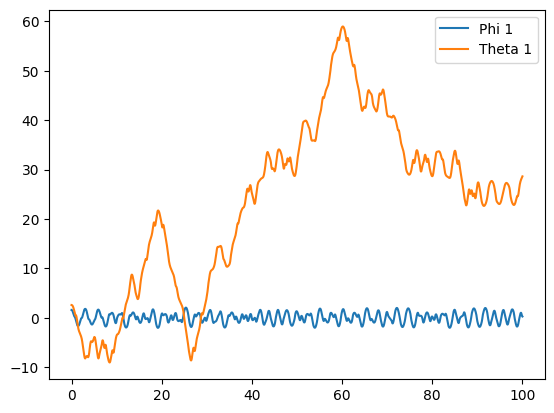

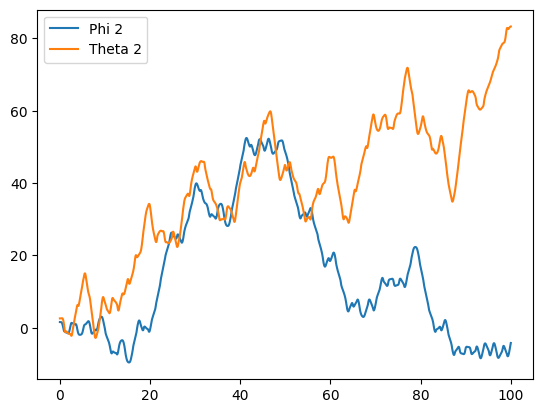

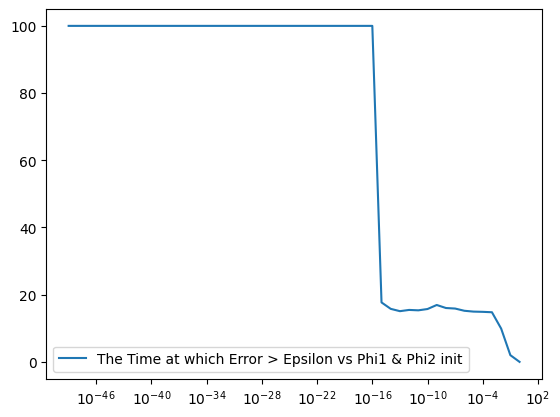

[1, 0.1, 0.010000000000000002, 0.0010000000000000002, 0.00010000000000000003, 1.0000000000000004e-05, 1.0000000000000004e-06, 1.0000000000000005e-07, 1.0000000000000005e-08, 1.0000000000000005e-09, 1.0000000000000006e-10, 1.0000000000000006e-11, 1.0000000000000006e-12, 1.0000000000000007e-13, 1.0000000000000008e-14, 1.0000000000000009e-15, 1.000000000000001e-16, 1.000000000000001e-17, 1.000000000000001e-18, 1.000000000000001e-19, 1.0000000000000011e-20, 1.0000000000000012e-21, 1.0000000000000012e-22, 1.0000000000000013e-23, 1.0000000000000014e-24, 1.0000000000000014e-25, 1.0000000000000015e-26, 1.0000000000000015e-27, 1.0000000000000015e-28, 1.0000000000000016e-29, 1.0000000000000017e-30, 1.0000000000000016e-31, 1.0000000000000017e-32, 1.0000000000000018e-33, 1.0000000000000019e-34, 1.0000000000000019e-35, 1.000000000000002e-36, 1.000000000000002e-37, 1.000000000000002e-38, 1.000000000000002e-39, 1.0000000000000022e-40, 1.0000000000000022e-41, 1.0000000000000023e-42, 1.0000000000000023

In [22]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import math

epsilon = np.pi/(16) ## Note that this is only 11 degress and that is still a very high error tolerence. You are more then welcome to change this

l1 =1 
l2 = 1
m1 =1
m2 = 1
phi1_init = np.pi/2
phi2_init = np.pi/2
diff1 = 1
diff2 = 1
tend = 100

cIC = 0.1
condend = 50


EthreshT = []
xvals = []

def f1 (u):
    M = m1 + m2
    x = (l2/l1)*(m2/M)*np.cos(u[0]-u[1])
    return(x)
def f2 (u):
    x = (l1/l2)*np.cos(u[0]-u[1])
    return(x)
def f3 (u): 
    M = m1 + m2
    x = -(l2/l1)*(m2/M)*(u[3]**2)*np.sin(u[0]-u[1])-(9.81/l1)*np.sin(u[0])
    return(x) 
def f4 (u):
    x = (l1/l2)*(u[2]**2)*np.sin(u[0]-u[1])-(9.81/l2)*np.sin(u[1])
    return(x) 
def DP(time, u):
    return([u[2],u[3],((f3(u)-f1(u)*f4(u))/(1-f1(u)*f2(u))),((-f2(u)*f3(u)+f4(u))/(1-f1(u)*f2(u)))])

def DoublePendulum(phi1, phi2):
    i = 0 
    tval = []
    while i <= tend:
        tval.append(i)
        i = i + 0.01
       
    sol = solve_ivp(DP,[0,tend],[phi1,phi2,0,0], method = 'Radau', t_eval = tval)
    y1list = []
    x1list = []
    y2list = []
    x2list = []
    for vals in sol.y[0]:
        x1list.append(l1*np.sin(vals))
        y1list.append(l1*np.cos(vals))
    i = 0 
    for vals in sol.y[1]:
        x2list.append(x1list[i]+l2*np.sin(vals))
        y2list.append(y1list[i]+l2*np.cos(vals))
        i = i + 1 

    path1 = [x1list,y1list,tval]
    path2 = [x2list,y2list,tval]
    path = [path1,path2]
    return(path)

def DoublePendulumGraph(phi1, phi2):
    i = 0 
    tval = []
    while i <= tend:
        tval.append(i)
        i = i +0.01
       
    sol = solve_ivp(DP,[0,tend],[phi1,phi2,0,0], method = 'Radau', t_eval = tval)
    phi1 = sol.y[0]
    phi2 = sol.y[1]
    
    return([phi1,phi2,tval])



## Graphs 
i = 0 
path1 = []
while i !=2:
    path1.append(DoublePendulumGraph(phi1_init+(diff1*i),phi2_init+(diff2*i)))
    i = i + 1
    
fig,ax1 = plt.subplots()
ax1.plot(path1[0][2],path1[0][0], label = "Phi 1")
ax1.plot(path1[1][2],path1[1][0], label = "Theta 1")
ax1.legend()
plt.show()

fig,ax11 = plt.subplots()
ax11.plot(path1[0][2],path1[0][1], label = "Phi 2")
ax11.plot(path1[1][2],path1[1][1], label = "Theta 2")
ax11.legend()
plt.show()


## ERROR PLOT
def Error (Phi2, Theta2):
    i = 0
    error1 = []
    while i != len(Theta2) :
        error1.append(abs(Phi2[i]-Theta2[i]))
        i = i + 1
    return(error1)

j = 0
while j != condend:
    phi = DoublePendulumGraph(phi1_init,phi2_init)[1]
    theta = DoublePendulumGraph(phi1_init + diff1,phi2_init+diff2)[1]
    t = DoublePendulumGraph(phi1_init, phi2_init)[2]
    e = Error(phi, theta)
    ##This is the condition you are changing, ie if you are chaning m1, have m1 = m1 + (cIC*j)
    ##phi2_init = phi2_init + (cIC)
    ## Here you want to have the condition you are changing, ie if you are changing m1, have m1+(cIC*j)
    xvals.append(diff1)
    indexL = []
    index = 0
    for vals in e: 
        if vals >= epsilon:
            indexL.append(index)
            index = index + 1
        else: 
            index = index + 1
    try:
        index = indexL[0]
    except IndexError:
        index = -1
    EthreshT.append(t[index])
    j = j + 1

fig,axIC = plt.subplots()
##If you want to change the title, its right here :) 
axIC.plot(xvals,EthreshT, label = "The Time at which Error > Epsilon vs Phi1 & Phi2 init")
axIC.legend()
plt.show()
    
        